In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 5

from ea_giving_optimizer.helpers import (
    Config,
    run_linear_optimization,
)

Quality adjusted lives saved: 355

Sum given: 12.4 million


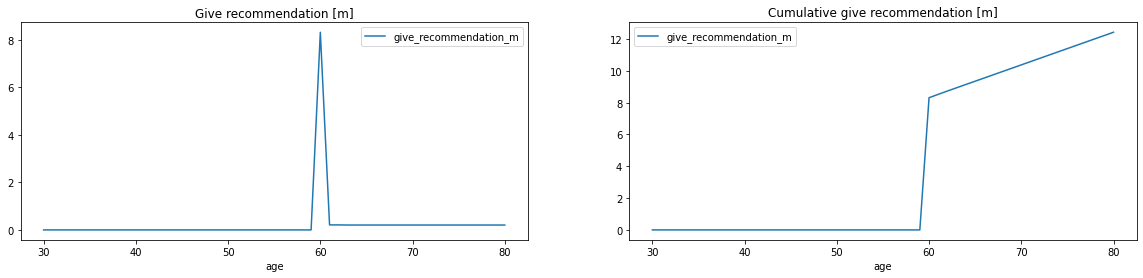

In [40]:
conf = Config(
    leak_multiplier_per_age = {30: 1, 60: 0.9, 75: 0.55, 80: 0.5}, 
    return_rate_after_inflation=0.03,
    existential_risk_discount_rate=0.024,
)

run_linear_optimization(conf, figsize=(20, 4))

In [ ]:
# TODO calculate how many lives subtracted from lives saved due to discounting existential risks

# Old approach - some of this will be deleted but might re-use some summary plots etc.

## Get recommended giving share per age

In [13]:
from ea_giving_optimizer.helpers import (
    best_giving_optuna,
    tot_give,
    cum_res_dicts,
    apply_cum_metrics
)

In [9]:
# If negative return after existential risk, then the baseline trial number 1 should win, giving everything
# each year without waiting
give_share_rec = best_giving_optuna(c=c, n_trials=10)

[I 2022-01-09 12:46:04,349] A new study created in memory with name: no-name-72ff2284-e55e-4a43-85d8-f513dd47008b
/Users/simonandersson/Desktop/code/ea-giving-optimizer/ea_giving_optimizer/helpers.py:260: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial(give_last_dict)
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(
/Users/simonandersson/Desktop/code/ea-giving-optimizer/ea_giving_optimizer/helpers.py:

[I 2022-01-09 12:46:04,444] Trial 8 finished with value: 8300.336216931491 and parameters: {30: 0.9259099106993928, 31: 0.1174202327574948, 32: 0.5252589474267505, 33: 0.8807131141677563, 34: 0.8353862248330957, 35: 0.04655021735968856, 36: 0.673101065269025, 37: 0.6308685255126625, 38: 0.20688307965493313, 39: 0.2189588632035625, 40: 0.2850902343004592, 41: 0.6452875519498728, 42: 0.7742207486589219, 43: 0.646477052994915, 44: 0.6232514293515317, 45: 0.49761159926919474, 46: 0.24622340623150907, 47: 0.3039303331472758, 48: 0.15369593889903987, 49: 0.3787443353068587, 50: 0.9640576206040895, 51: 0.19805832477280472, 52: 0.19913872241621466, 53: 0.5773598623800513, 54: 0.9913997046195104, 55: 0.7935253996194741, 56: 0.6686296387717033, 57: 0.7551739649002294, 58: 0.38775705557057505, 59: 0.5502085120152052, 60: 0.33815162384653075, 61: 0.7227572374309533, 62: 0.09598607484985333, 63: 0.3866040320271581, 64: 0.4467378494191082, 65: 0.3083697185376465, 66: 0.9922935680105446, 67: 0.881435

## Summarize results

244 lives saved


<AxesSubplot:xlabel='age'>

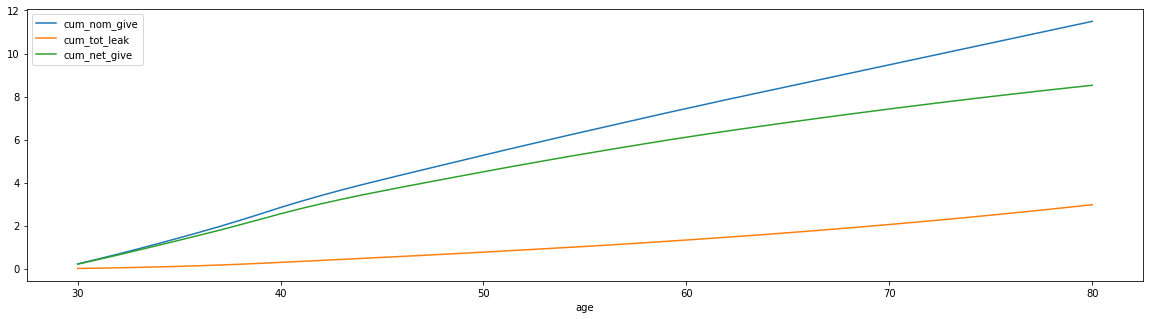

In [10]:
conf = apply_cum_metrics(conf, give_share_rec)
conf.print_lives_saved()
(conf.df.iloc[:, -3:]/1000).plot()

## Naive reality check

In [11]:
# Reality check vs disposable salary per year giving everything but no interest or discounting of ex risk
# Should be higher than "optimized" result if net return is lower than 1 due to existential risk discounting 
# (leading to giving everything immediately being the best solution)
print(round((c.df.disposable_salary/c.save_qa_life_cost_k).sum()), "lives saved naive calculation no interest or discounting")

332 lives saved naive calculation no interest or discounting
